In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import precision_recall_curve

from sklearn.svm import SVC

In [2]:
df = pd.read_csv(r"C:\Users\whori\Desktop\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df["Class"].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

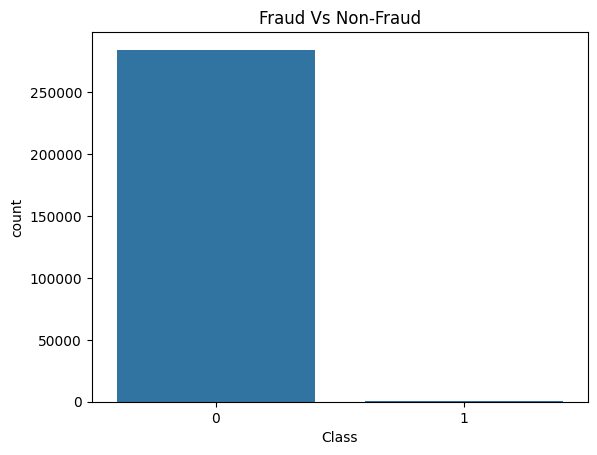

In [6]:
sns.countplot(data=df, x='Class' )
plt.title('Fraud Vs Non-Fraud')
plt.show()

<Axes: xlabel='Amount', ylabel='Count'>

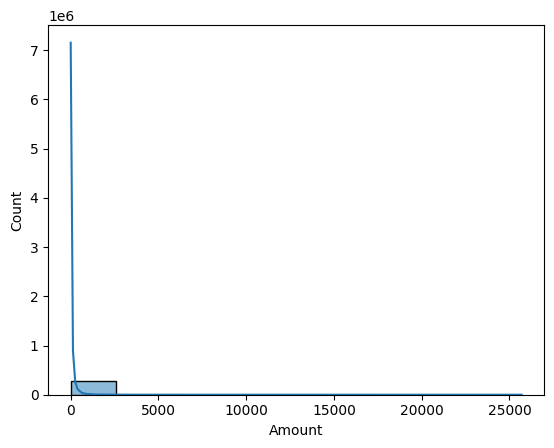

In [7]:
sns.histplot(df["Amount"], bins=10, kde=True)

<Axes: >

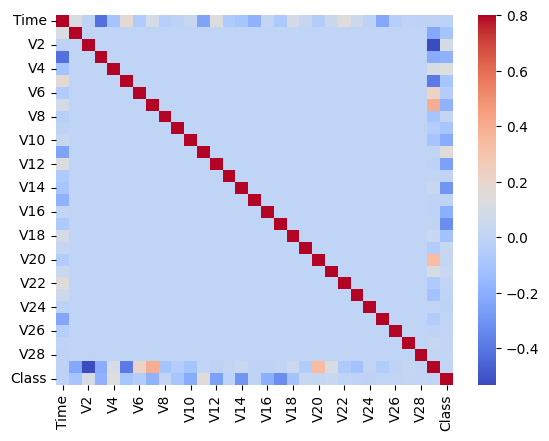

In [8]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', vmax=0.8)

<Axes: xlabel='Amount'>

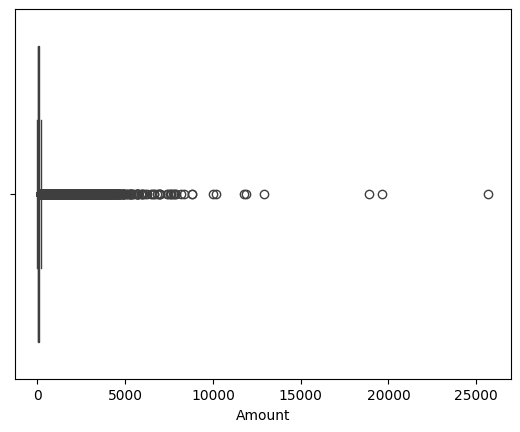

In [9]:
sns.boxplot(x=df["Amount"])

In [10]:
df.duplicated().sum()

1081

In [11]:
df = df.drop_duplicates()


In [12]:
df.duplicated().sum()

0

In [13]:
scaler = StandardScaler()

df.loc[:, 'Amount_Scaled'] = scaler.fit_transform(df[['Amount']])
df.loc[:, 'Time_Scaled'] = scaler.fit_transform(df[["Time"]]) 

In [14]:
df = df.drop(columns=["Amount", "Time"])


In [15]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount_Scaled,Time_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244200,-1.996823
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342584,-1.996823
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.158900,-1.996802
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.139886,-1.996802
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073813,-1.996781


In [16]:
X = df.drop('Class', axis=1)
y = df['Class']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [18]:
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

In [19]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(" ROC-AUC Score:", roc_auc_score(y_test, y_proba))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.87      0.11        95

    accuracy                           0.98     56746
   macro avg       0.53      0.92      0.55     56746
weighted avg       1.00      0.98      0.99     56746

Confusion Matrix:
 [[55255  1396]
 [   12    83]]
 ROC-AUC Score: 0.9658137683266611


In [20]:
rf = RandomForestClassifier(
    n_estimators = 100,
    class_weight = 'balanced',
    max_depth = None,
    random_state = 42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

In [21]:
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print(" ROC-AUC Score:", roc_auc_score(y_test, y_proba_rf))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.99      0.73      0.84        95

    accuracy                           1.00     56746
   macro avg       0.99      0.86      0.92     56746
weighted avg       1.00      1.00      1.00     56746

Confusion Matrix:
 [[56650     1]
 [   26    69]]
 ROC-AUC Score: 0.9141447774880176


In [22]:
X_sample, _, y_sample, _ = train_test_split(X_train, y_train, train_size=0.1, stratify=y_train, random_state=42)


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3]
}

random_search = RandomizedSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_distributions=param_grid,
    n_iter=5,  
    scoring='f1',
    cv=3,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_sample, y_sample)
best_model = random_search.best_estimator_


In [23]:
print(best_model)

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_split=5, random_state=42)


In [24]:
rf_tuned = RandomForestClassifier(
    class_weight='balanced',
    min_samples_split=5,
    random_state=42
)

rf_tuned.fit(X_train, y_train)


y_pred_rf_tuned = rf_tuned.predict(X_test)
y_proba_rf_tuned = rf_tuned.predict_proba(X_test)[:, 1]


print(" Classification Report:\n", classification_report(y_test, y_pred_rf_tuned))
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_tuned))
print(" ROC-AUC Score:", roc_auc_score(y_test, y_proba_rf_tuned))


 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.72      0.82        95

    accuracy                           1.00     56746
   macro avg       0.99      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746

 Confusion Matrix:
 [[56649     2]
 [   27    68]]
 ROC-AUC Score: 0.9296546072954535


In [25]:
y_scores = rf_tuned.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)


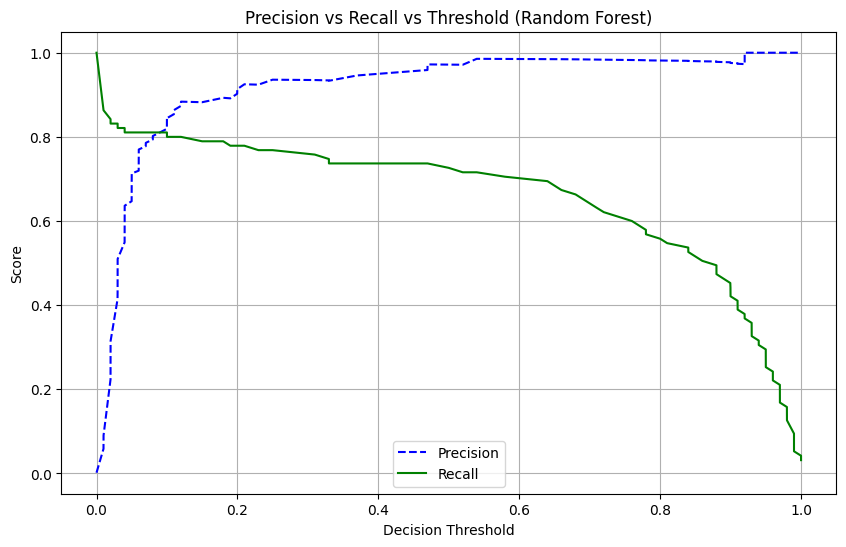

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision vs Recall vs Threshold (Random Forest)")
plt.legend()
plt.grid(True)
plt.show()

In [27]:
custom_thresh = 0.15
y_pred_custom = (y_scores >= custom_thresh).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test, y_pred_custom))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.89      0.79      0.84        95

    accuracy                           1.00     56746
   macro avg       0.95      0.89      0.92     56746
weighted avg       1.00      1.00      1.00     56746

Confusion Matrix:
 [[56642     9]
 [   20    75]]


In [28]:
importances = rf_tuned.feature_importances_
features = X.columns

In [29]:
feat_importance = pd.DataFrame({
    "Feature": features,
    "Importance": importances
})


feat_importance = feat_importance.sort_values(by="Importance", ascending=False)

feat_importance.head(10)

,Feature,Importance
13,V14,0.213830
9,V10,0.118371
16,V17,0.105410
3,V4,0.093554
11,V12,0.080720
10,V11,0.071434
2,V3,0.069013
15,V16,0.041994
1,V2,0.024515
6,V7,0.023208


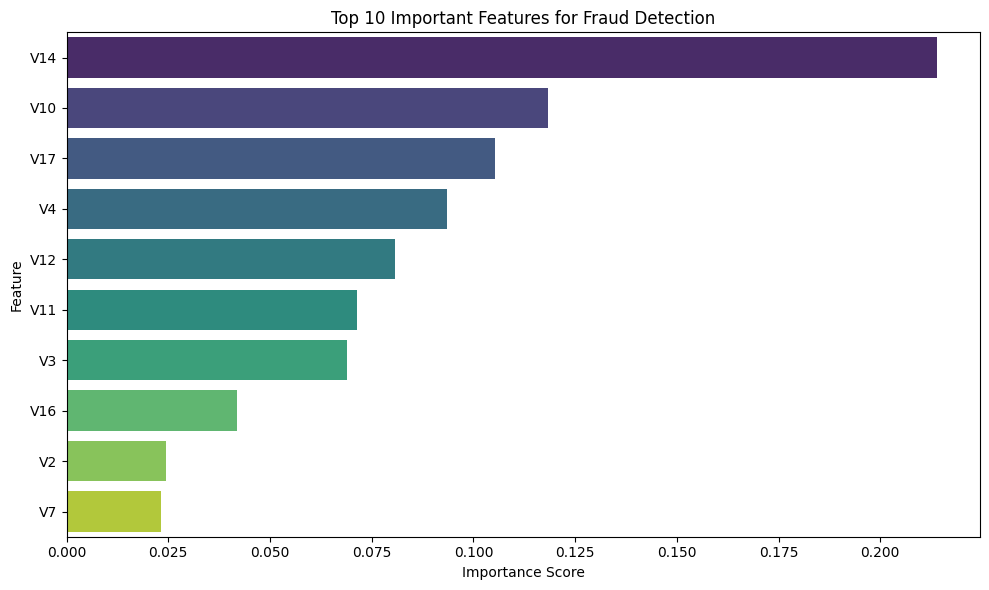

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_importance.head(10), palette="viridis", legend=False, hue='Feature')
plt.title("Top 10 Important Features for Fraud Detection")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [31]:
top_features = feat_importance['Feature'].head(10).tolist()

X_train_top = X_train[top_features]
X_test_top = X_test[top_features]



In [32]:
rf_top = RandomForestClassifier(
    class_weight='balanced',
    min_samples_split=5,
    random_state=42
)

rf_top.fit(X_train_top, y_train)

RandomForestClassifier(class_weight='balanced', min_samples_split=5,
                       random_state=42)

In [33]:
y_scores_top = rf_top.predict_proba(X_test_top)[:, 1]
y_pred_top = (y_scores_top >= 0.15).astype(int)

print(" Classification Report:\n", classification_report(y_test, y_pred_top))
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred_top))
print(" ROC-AUC Score:", roc_auc_score(y_test, y_scores_top))

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.85      0.78      0.81        95

    accuracy                           1.00     56746
   macro avg       0.93      0.89      0.91     56746
weighted avg       1.00      1.00      1.00     56746

 Confusion Matrix:
 [[56638    13]
 [   21    74]]
 ROC-AUC Score: 0.9193435522576365


In [34]:
top_5_features = top_features[:5]
X_train_5 = X_train[top_5_features]
X_test_5 = X_test[top_5_features]

rf_5 = RandomForestClassifier(class_weight='balanced', min_samples_split=5, random_state=42)
rf_5.fit(X_train_5, y_train)

y_scores_5 = rf_5.predict_proba(X_test_5)[:, 1]
y_pred_5 = (y_scores_5 >= 0.15).astype(int)

print(classification_report(y_test, y_pred_5))
print(confusion_matrix(y_test, y_pred_5))
print("ROC-AUC Score:", roc_auc_score(y_test, y_scores_5))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.82      0.78      0.80        95

    accuracy                           1.00     56746
   macro avg       0.91      0.89      0.90     56746
weighted avg       1.00      1.00      1.00     56746

[[56635    16]
 [   21    74]]
ROC-AUC Score: 0.9144891761096798


In [35]:
svm_model = SVC(kernel="rbf", class_weight="balanced", probability=True, random_state=42)
svm_model.fit(X_train, y_train)

SVC(class_weight='balanced', probability=True, random_state=42)

In [37]:
import joblib

# Save models
joblib.dump(rf_tuned, "rf_full_model.joblib")
joblib.dump(log_reg, "log_reg_full_model.joblib")
joblib.dump(rf_top, "rf_top10_model.joblib")
joblib.dump(rf_5, "rf_top5_model.joblib")
joblib.dump(svm_model, "svm_model.joblib")

# Save feature sets
joblib.dump(X.columns.tolist(), "features_full.joblib")
joblib.dump(top_features, "features_top10.joblib")
joblib.dump(top_features[:5], "features_top5.joblib")

# Save threshold
joblib.dump(0.15, "custom_threshold.joblib")


['custom_threshold.joblib']

In [38]:
import os

In [39]:
os.listdir()


['.anaconda',
 '.bash_history',
 '.cache',
 '.conda',
 '.condarc',
 '.continuum',
 '.git',
 '.gitconfig',
 '.gitmodules',
 '.idlerc',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.lesshst',
 '.m2',
 '.matplotlib',
 '.nbi',
 '.node_repl_history',
 '.rest-client',
 '.ssh',
 '.streamlit',
 '.vscode',
 'anaconda3',
 'AppData',
 'Application Data',
 'Contacts',
 'Cookies',
 'custom_threshold.joblib',
 'Desktop',
 'Documents',
 'Downloads',
 'EDA.ipynb',
 'Favorites',
 'features_full.joblib',
 'features_top10.joblib',
 'features_top5.joblib',
 'fraud_rf_top5_model.joblib',
 'GlassFish_Server',
 'go',
 'hello',
 'housing.ipynb',
 'IntelGraphicsProfiles',
 'Links',
 'Local Settings',
 'log_reg_full_model.joblib',
 'miniproject',
 'mnist(chp3).ipynb',
 'Music',
 'My Documents',
 'my_project',
 'NCH Software Suite',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{fd3e7ebe-79b0-11ee-b699-94a5f48f180c}.TM.blf',
 'NTUSER.DAT{fd3e7ebe-79b0-11ee-b699-94a5f48f180c

In [40]:
os.getcwd()

'C:\\Users\\whori'

In [43]:
import joblib

# Save directly to your VS Code app folder path
joblib.dump(rf_tuned, "C:/Users/whori/Desktop/fraud_dashboard/rf_full_model.joblib")
joblib.dump(X.columns.tolist(), "C:/Users/whori/Desktop/fraud_dashboard/features_full.joblib")
joblib.dump(0.15, "C:/Users/whori/Desktop/fraud_dashboard/custom_threshold.joblib")
joblib.dump(log_reg, "C:/Users/whori/Desktop/fraud_dashboard/log_reg_full_model.joblib")
joblib.dump(svm_model, "C:/Users/whori/Desktop/fraud_dashboard/svm_model.joblib")


['C:/Users/whori/Desktop/fraud_dashboard/svm_model.joblib']